# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices


## Getting Started
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
# libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Loading the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
Calculating descriptive statistics about the Boston housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In [2]:
# Converting to numpy array for easy operations
prices_np = np.array(prices)
 
# Minimum price of the data
minimum_price = prices_np.min()

# Maximum price of the data
maximum_price = prices_np.max()

# Mean price of the data
mean_price = prices_np.mean()

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = prices_np.std()

# Displaying the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


**Will an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'` ?**

**Answer: ** <br> <br>

A home with greater value of RM (number of rooms) will affect/increase the price (MEDV) of that home, as it will increase the carpet area of the home. <br> <br>
A neighborhood with greater value of LSTAT (lower class workers) will affect/decrease the price (MEDV) of homes in that neighborhood, as people with low income will not be able to afford expensive homes.  <br> <br>
A neighborhood with greater value of PTRATIO (ratio of students to teachers) will affect/decrease the prices of homes as not many people will prefer a young neighborhood. People with low budget or people under age of 30 years may prefer a young neighborhood.(This is highly subjective)  <br> <br>



----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in our predictions.

### Implementation: Defining a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable.

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculating the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Returning the score
    return score

### Question 2 - Goodness of Fit
Let's assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Calculating this model's coefficient of determination.

In [4]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

**Answer:** <br><br>
coefficient of determination R^2(R-squared) is the proportion of the variance in the dependent variable that is predictable from the independent variable <br><br> R^2 = 1 - (Sum of Squared Errors / Total Sum of squares)<br><br> 
Yes, the model has successfully captured the variation of the target variable, <br>The model has captured 92% variation in the target variable and has a fairly strong correlation<br>


### Implementation: Shuffle and Split Data
Now we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.


 - Splitting the data into 80% training and 20% testing.
 - Setting the `random_state` for `train_test_split` to a value of our choice. This ensures results are consistent.
- Assigning the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Importing 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size = 0.20, random_state = 1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?


**Answer: ** <br> <br> 
When we measure generalization, we do it by observing the model performance on a data set which has not been seen by the ML model.<br>  When we evaluate the model on the unseen data, we would need the true values for that unseen data for us to compare the model predictions with. <br>

If we train the model on the whole available data set, it would memorize all the true values and will have a perfect accuracy. Hence we would not be able to check its performance on unseen data set.<br><br> This is the reason we split the data into ratio of training and testing subsets. So that we can to check for generalization of trained model.



----

## Analyzing Model Performance
In this third section of the project,we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

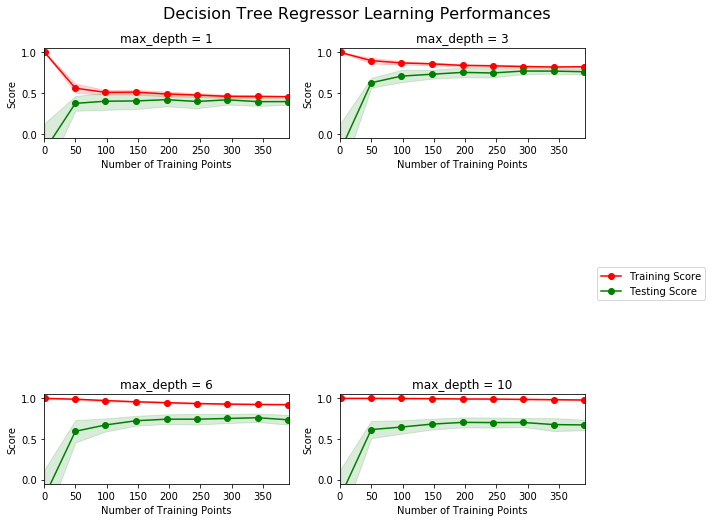

In [6]:
# Producing learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Answer: **

I Choose the first graph, Max Depth = 1 

As more training points are added, <br><br>
The score of the training curve decreases. This is because the model becomes harder, to fit to a larger sample. <br>
The score of the testing curve increases, but it seems to level off around 350 points.This is because the model reaches its maximum effectiveness 

Having more training points would not benefit the model further, since the testing curve level off around 350 points. 


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

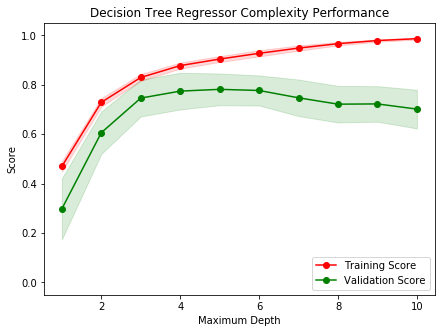

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 

* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Answer: **

 When the model is trained with max depth of 1, from the graph, we observe an underfitting, hence it suffers from High Bias. <br>The two lines are very close together but the overall performance is very poor for both training and testing data, is a good indicator of high bias.  

When the model is trained with max depth of 10, from the graph, we observe an overfitting, hence it suffers from High Variance. <br>The size of the gap between the training score and the validation score lines serves as a visual cue to justify this conclusion

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

**Answer: **<br>
max depth = 4 
<br> From the graph we observe, minimum distance between points, of the two curves, is at max depth = 4 

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

**Answer: **
* What is the grid search technique?<br><br>
Grid search can be used to find out best hyper-parameter combination for any ML algorithm for a data set <br>
For example - <br><br>
In an SVM, there are hyper parameters such as KERNEL and C<br>
Kernel can be Linear or Polynomial<br>
C can be Small or Large <br><br>
To pick the best combination between kernel and C we do a GRID Search.<br>
In Grid Search, we make a table with all possibilities and pick the best one. <br>
<br> The table consist of <br>
Columns - Kernel ( linear , polynomial )<br>
Rows - different values of C 
(recommended to take values that grow exponentially eg: 0.1 , 1 , 10 , 100 , 1000 etc) <br><br>

* How it can be applied to optimize a learning algorithm? <br> 



    I. We use our training set to train a few  linear models and polynomial models, with different values of C. 
    II. Then we use cross validation set to calculate score of evaluation metric on all these models. 
    III. We pick the model with the highest score of the evaluation metric.
    IV. At the very end we use our testing set to see how our model performs.


### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Answer: ** <br> <br> 
k-Fold CV is an algorithm validation technique, i.e whether a given algorithm will train properly or not.<br><br>
The main purpose of k-fold cross validation is that once when we are satisfied that a particular algorithm is good for a particular data set, we test it on the dataset we had kept aside at the beginning.

In this technique we randomly break the data into small sets, called k-buckets. <br>
Here 'k' denotes the number of sets we make from the original dataset.

    1. We break the data into k-buckets.
    2. Then we train our model k times, each time using a different bucket (as our training set)
    3. Then we take average of the results to get the final model.



This technique  is used to avoid overfitting. Hence increasing algorithm's accuracy in, classifying any new, previously unknown data point. <br>

We are able to use all data for training and testing - which is useful for smaller sample sizes. <br>
The same data will also never be reused for testing, unlike other cross-validation techniques.

### Implementation: Fitting a Model
Our final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, we will find our implementation is using `ShuffleSplit()` for an alternative form of cross-validation. While it is not the K-Fold cross-validation technique, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.

In [8]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Created cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Created a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Created a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # Transformed 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Created the grid search cv object --> GridSearchCV()
    # Made sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and cv='cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Fitting the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Returning the optimal model after fitting the data
    return grid.best_estimator_

/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

In [9]:
# Fitting the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Producing the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **
The maximum depth of the optimal model is 5, this aligns very closely with the answer given in Question 6, that is, max depth = 4.

### Question 10 - Predicting Selling Prices
Consider the information from three clients from Boston:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $419,700.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00


**Answer:** <br> <br>
Statistics for Boston housing dataset: <br><br>
Minimum price: 105,000.0 <br>
Maximum price: 1,024,800.0 <br> 
Mean price: 454,342.9447852761 <br>  Median price: 438,900.0 <br>
Standard deviation of prices: 165,171.13154429474 <br>
<br>Model Predictions: <br><br>
Predicted selling price for Client 1's home: 419,700.00 <br>
Predicted selling price for Client 2's home: 287,100.00 <br>
Predicted selling price for Client 3's home: 927,500.00 <br><br>

As Client 3 has <br> 
the biggest house, (i.e High value of 'RM': number of rooms) <br>
In the best public school neighborhood, <br>
With the lowest poverty level. (i.e Low value of 'LSTAT': % of owners in neighbourhood considered lower class)  <br><br>
The prediction of 927,500 seems accurate as statistics for boston housing dataset indicate maximum prices go as high as 1,024,800.0  <br><br>
Client 2 has <br>
the smallest house,  (i.e Low value of 'RM': number of rooms)) <br>
in a neighborhood with a relatively high poverty rate  (i.e High value of 'LSTAT': % of owners in neighbourhood considered lower class)) <br>
And not the best public schools. <br><br>
The prediction of 287,100 seems accurate as statistics for boston housing dataset indicate minimum prices go as low as 105,000.0 <br><br>

**However one very import factor to consider here is that, this data is very old, prices of respective homes can have significant difference in 2018 compared to when this data was collected. **

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Answer: **<br><br>
Relevancy: The data collected is very old, the prices today will be very different because of inflation. <br><br>
Applicable: A model training on data from a city such as Boston, is not suitable to be used in areas such as Ohio or San Francisco <br><br>
Features: Although the dataset covers features which are present in today's homes, it is missing features that could affect the selling price in today's housing market such as size of a backyard or approximity to public transit if the home is in a large city.<br><br>
Robustness: The current model appears to be not well generalized as running it multiple times for a specific client (as seen above) provides a wide variance in pricing.

**Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood? **
<br>Answer: <br><br>
It is not fair to judge the price of an individual home ONLY BASED on the characteristics of the neighborhood.
It is one of the important parameter for considering the overall decision. (it is subjective.)


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.